In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random 
import tensorflow as tf
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation
from tensorflow.keras.models import Sequential # for to be able to build a layer by layer CNN model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout # conv kernel, maxpooling op, flatting the input, ....
from tensorflow.keras.optimizers import Adam # optimization algo to update netqork weights during training
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
train_dir = 'Train'
test_dir = 'Test'

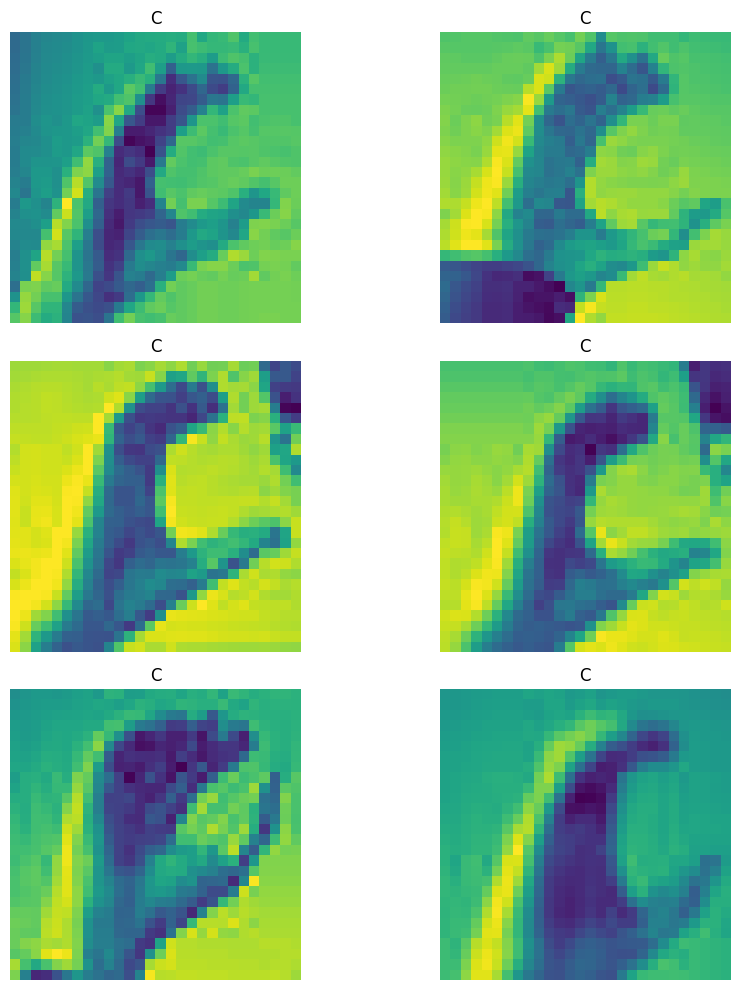

In [60]:
class_directories = [os.path.join(train_dir, directory) for directory in sorted(os.listdir(train_dir))]


fig, axes = plt.subplots(3, 2, figsize=(10, 10))


for idx, class_dir in enumerate(class_directories):
    image_files = os.listdir(class_dir)
    random_images = random.sample(image_files, 6)
    for i, image_file in enumerate(random_images):
        image_path = os.path.join(class_dir, image_file)
        image = plt.imread(image_path)
        axes[int(i / 2), i % 2].imshow(image)
        axes[int(i / 2), i % 2].axis('off')
        axes[int(i / 2), i % 2].set_title(os.path.basename(class_dir))
    if idx == 2: 
        break


plt.tight_layout()
plt.show()

In [61]:
Train_dgen = ImageDataGenerator(
rescale=1./255,
width_shift_range=0.1,
validation_split=0.2)

In [62]:
Test_dgen = ImageDataGenerator(
rescale=1./255)

In [63]:
train_gen = Train_dgen.flow_from_directory(
train_dir,
target_size = (28, 28),
batch_size = 64,
color_mode='grayscale',
class_mode = 'sparse',
subset='training')

Found 12848 images belonging to 15 classes.


In [64]:
valid_gen = Train_dgen.flow_from_directory(
train_dir,
target_size=(28,28),
batch_size=64,
color_mode='grayscale',
class_mode='sparse',
subset='validation'
)

Found 3205 images belonging to 15 classes.


In [65]:
test_gen = Test_dgen.flow_from_directory(
test_dir,
target_size=(28,28),
batch_size=64,
class_mode='sparse',
color_mode='grayscale')

Found 7172 images belonging to 24 classes.


In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(24, activation='softmax')
]
)

c:\Users\Duma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,632 (1.91 MB)

 Trainable params: 500,632 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
metrics = ['accuracy']
model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='sparse_categorical_crossentropy',
    metrics=metrics
)

In [69]:
history = model.fit(
train_gen,
epochs=10,
validation_data = valid_gen
)

Epoch 1/10


c:\Users\Duma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.2319 - loss: 2.3503 - val_accuracy: 0.8246 - val_loss: 0.5949
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8502 - loss: 0.4577 - val_accuracy: 0.9498 - val_loss: 0.1564
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9606 - loss: 0.1348 - val_accuracy: 0.9860 - val_loss: 0.0610
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9851 - loss: 0.0606 - val_accuracy: 0.9878 - val_loss: 0.0390
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9797 - val_loss: 0.0567
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9951 - loss: 0.0202 - val_accuracy: 0.9931 - val_loss: 0.0350
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.9959 - loss: 0.0182 - val_accuracy: 0.9988 - val_loss: 0.0067
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9980 - loss: 0.0080 - val_accuracy

In [70]:
predics = model.evaluate(test_gen)


113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 404ms/step - accuracy: 0.6639 - loss: 9.5936
